In [ ]:
# HIDDEN": "remove-cell
# cell to import all dependencies to run in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !"{sys.executable}" -m pip install -U mlxtend pycaret pandas-profiling
else:
  print('Not running on CoLab')

# Model Training

Onze data is nu klaar om getrained te worden. We kunnen ML toepasssingen opdelen in 2 grote categorien.  We zullen gebruik maken van de low code library pycaret om alles te demonstreren.

## Unsupervised

Unsupervised learning maakt gebruik van machine learning-algoritmen om ongelabelde datasets te analyseren en te clusteren. Deze algoritmen ontdekken verborgen patronen in gegevens zonder dat menselijke tussenkomst nodig is (daarom zijn ze "zonder toezicht").

Niet-gesuperviseerde leermodellen worden gebruikt voor drie hoofdtaken: clustering, associatie en dimensionaliteitsreductie:

Dimensionaliteitsreductie is een leertechniek die wordt gebruikt wanneer het aantal kenmerken (of dimensies) in een bepaalde dataset te hoog is. Het reduceert het aantal gegevensinvoer tot een beheersbare omvang en behoudt tegelijkertijd de gegevensintegriteit. 

### Clustering 

is een dataminingtechniek voor het groeperen van niet-gelabelde gegevens op basis van hun overeenkomsten of verschillen. K-means clusteringalgoritmen wijzen bijvoorbeeld vergelijkbare gegevenspunten toe aan groepen, waarbij de K-waarde de grootte van de groepering en granulariteit vertegenwoordigt. Deze techniek is handig voor marktsegmentatie, beeldcompressie, enz.

In [2]:
from pycaret.datasets import get_data
jewellery = get_data('jewellery')
from pycaret.clustering import *
exp_name = setup(data = jewellery,silent=True)

,Description,Value
0,session_id,3482
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


In [3]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8113,0.4114,0,0,0


In [6]:
kmeans_df = assign_model(kmeans)
kmeans_df.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 0
1,59,81799,0.791082,5417.661426,Cluster 0
2,62,74751,0.702657,9258.992965,Cluster 0
3,59,74373,0.765680,7346.334504,Cluster 0
4,87,17760,0.348778,16869.507130,Cluster 2


In [8]:
 plot_model(kmeans,plot= 'distribution')

Met de elbow techniek kunnen we het optimaal aantal clusters gaan berekenen.

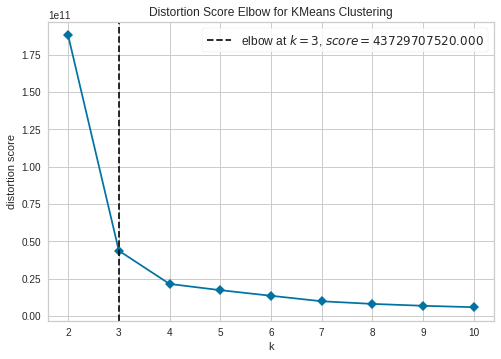

In [9]:
 plot_model(kmeans,plot= 'elbow')

### Associatie regels

 is unsupervised ML techniek die gebruikt wordt om relaties tussen variabelen in een bepaalde dataset te vinden. Deze methoden worden vaak gebruikt voor marktmandanalyse en aanbevelingsengines, in de trant van "Klanten die dit artikel kochten, kochten ook".

In [2]:
from pycaret.datasets import get_data
data = get_data('france')
from pycaret.arules import *
exp = setup(data = data, transaction_id = 'InvoiceNo', item_id = 'Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


Description,Value
session_id,3496
# Transactions,461
# Items,1565
Ignore Items,None


In [3]:
rule1 = create_model(metric='confidence', threshold=0.7, min_support=0.05)

In [6]:
plot_model(rule1, plot='3d')

### Dimensionaliteitsreductie 

is een leertechniek die wordt gebruikt wanneer het aantal kenmerken (of dimensies) in een bepaalde dataset te hoog is. Het reduceert het aantal tot een beheersbare omvang en behoudt tegelijkertijd de gegevensintegriteit.

Dimensionaliteitsreductie technieken worden veel gebruikt bij feature engineering. 

### Curse of dimensionality  

wanneer de dimensionaliteit toeneemt, neemt het volume van de ruimte zo snel toe dat de beschikbare gegevens schaars worden. Deze schaarste is problematisch voor elke methode die statistische significantie vereist


## Supervised

Supervised learning is een machine learning-benadering die wordt gedefinieerd door het gebruik van gelabelde datasets. Deze datasets zijn ontworpen om algoritmen te trainen of te "superviseren" om gegevens te classificeren of resultaten nauwkeurig te voorspellen. Met behulp van gelabelde inputs en outputs kan het model zijn nauwkeurigheid meten en in de loop van de tijd leren.

Gesuperviseerd leren kan worden onderverdeeld in twee soorten problemen bij datamining: classificatie en regressie:



## Classification

is een algoritme om testgegevens nauwkeurig toe te wijzen aan specifieke categorieën, zoals het scheiden van appels van peren.

In [1]:
from pycaret.datasets import get_data
juice = get_data('juice')
from pycaret.classification import *
exp_name = setup(data = juice, silent = True,  target = 'Purchase')

,Description,Value
0,session_id,857
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [2]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8248,0.8969,0.7379,0.7990,0.7641,0.6257,0.6297,0.3170
ridge,Ridge Classifier,0.8248,0.0000,0.7552,0.7892,0.7687,0.6283,0.6316,0.0060
lda,Linear Discriminant Analysis,0.8235,0.8968,0.7586,0.7835,0.7680,0.6260,0.6289,0.0090
gbc,Gradient Boosting Classifier,0.8168,0.8968,0.7483,0.7773,0.7588,0.6118,0.6157,0.0420
ada,Ada Boost Classifier,0.8089,0.8840,0.7000,0.7877,0.7368,0.5884,0.5946,0.0390
lightgbm,Light Gradient Boosting Machine,0.7928,0.8765,0.7276,0.7356,0.7294,0.5619,0.5641,0.0840
rf,Random Forest Classifier,0.7902,0.8726,0.7069,0.7439,0.7230,0.5546,0.5569,0.1860
et,Extra Trees Classifier,0.7808,0.8454,0.7172,0.7244,0.7182,0.5393,0.5419,0.1390
nb,Naive Bayes,0.7460,0.8377,0.7586,0.6502,0.6988,0.4821,0.4879,0.0080
dt,Decision Tree Classifier,0.7354,0.7235,0.6724,0.6574,0.6627,0.4456,0.4475,0.0090


Metrics

Als we de voorspelde resulataten van een model hebben dan kunnen we deze vergelijken met de effectieve waarden. Deze metrics geven ons inzichten over het model. We proberen altijd ten opzichten van een bepaalde metric te gaan optimaliseren. Omdat alle metrics wel een iets ander aspect van het model accentueren. Bij classificatie kijken we vooral naar de confusion matrix.

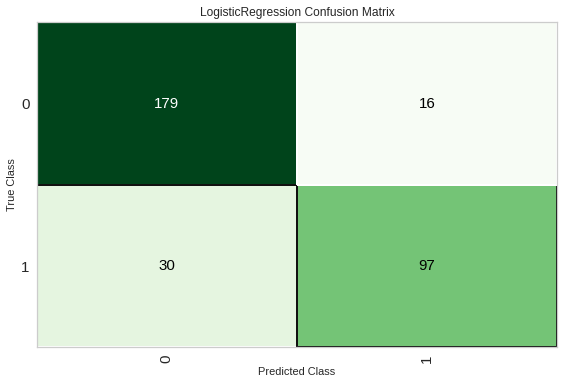

In [8]:
lr = create_model('lr')
plot_model(lr,'confusion_matrix')

Performance metrics zijn dan een specifieke combinatie van deze TP FP TN FN.    

Precision = TP/(TP+FP)

[Metrics](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)

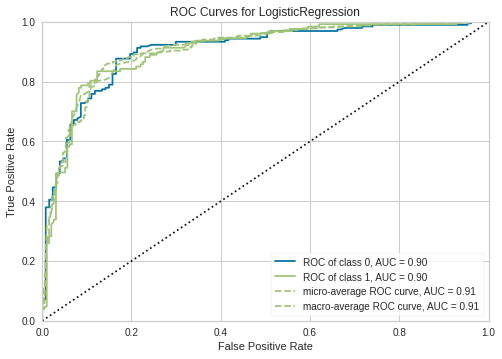

In [9]:
plot_model(lr)

![explainroc](./images/fig3.png)![explainroc](./images/fig3a.png)   

![explainroc](./images/fig2.png)![explainroc](./images/fig2a.png) 

![explainroc](./images/fig1.png)![explainroc](./images/fig1a.png)   


## Regressie 

Regressiemodellen zijn handig voor het voorspellen van numerieke waarden op basis van verschillende gegevenspunten, zoals projecties van verkoopopbrengsten voor een bepaald bedrijf.Regressie is een ander type begeleide leermethode die een algoritme gebruikt om de relatie tussen afhankelijke en onafhankelijke variabelen te begrijpen. Regressiemodellen zijn handig voor het voorspellen van numerieke waarden op basis van verschillende gegevenspunten, zoals projecties van verkoopopbrengsten voor een bepaald bedrijf. Enkele populaire regressie-algoritmen zijn lineaire regressie, logistische regressie en polynomiale regressie.

In [10]:
from pycaret.datasets import get_data
boston = get_data('boston')
from pycaret.regression import *
exp_name = setup(data = boston, silent=True ,  target = 'medv')

,Description,Value
0,session_id,8258
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


In [11]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1860,11.2208,3.2197,0.8665,0.1489,0.1150,0.0280
et,Extra Trees Regressor,2.2128,11.8788,3.3082,0.8583,0.1510,0.1168,0.1310
rf,Random Forest Regressor,2.3093,12.6601,3.4247,0.8506,0.1562,0.1218,0.1780
lightgbm,Light Gradient Boosting Machine,2.3441,14.2710,3.6446,0.8275,0.1597,0.1202,0.1130
ada,AdaBoost Regressor,2.8321,16.8243,3.9453,0.7996,0.1883,0.1538,0.0310
lr,Linear Regression,3.3962,25.0559,4.9154,0.7010,0.2472,0.1726,0.2640
ridge,Ridge Regression,3.3697,25.5272,4.9523,0.6957,0.2474,0.1720,0.0060
br,Bayesian Ridge,3.4038,26.4720,5.0553,0.6839,0.2466,0.1745,0.0060
dt,Decision Tree Regressor,3.3262,27.2770,5.0770,0.6606,0.2174,0.1721,0.0090
en,Elastic Net,3.7978,30.2216,5.4537,0.6382,0.2663,0.1874,0.0080


In [12]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3561,25.3518,5.0351,0.6549,0.4418,0.2286
1,3.5263,20.5514,4.5334,0.7746,0.1984,0.1569
2,3.9054,40.6706,6.3774,0.5851,0.2480,0.1718
3,2.9353,11.8452,3.4417,0.8145,0.2066,0.1903
4,3.1373,15.5613,3.9448,0.7663,0.1857,0.1498
5,3.8067,26.5857,5.1561,0.7747,0.1955,0.1619
6,2.9336,18.8113,4.3372,0.7752,0.2155,0.1686
7,3.4398,19.5141,4.4175,0.7044,0.3351,0.1918
8,4.0660,43.0305,6.5598,0.4934,0.2509,0.1746
9,2.8559,28.6375,5.3514,0.6665,0.1946,0.1315


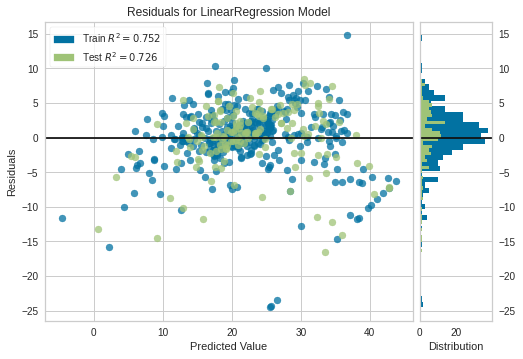

In [13]:
plot_model(lr)

## Models

We gaan even kort schetsen hoe de volgende modellen werken. 

### Lineaire modellen

![lm](./images/linear_regression.png)


### Decision trees

![dt](./images/decison_tree.png)



## Train/Test

## Hyperparameters 

## Ensembles

### Stacking

### Bagging

### Boosting

## Overfitting

